<a href="https://colab.research.google.com/github/princeaggarwal99/sanjayaggarwalsk-gmail.com/blob/master/assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline

In [5]:
data=pd.read_csv('salary.csv', encoding = "ISO-8859-1")

In [8]:
pd.set_option('max_columns', None)
data.head()

,id,Target_Salary,Target_Satisfied,LOAN_AMT,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,HopeFiveYears,JobSearchStatus,LastNewJob,UpdateCV,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,Methodology,VersionControl,CheckInCode,AIDangerous,AIInteresting,AIResponsible,AIFuture,Age,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,dti,earliest_cr_line,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,Time,emp_length,your_favoritearticle_today,url,Email,homeaddress,latitude,longitude,PHONE,officeaddress,website,dateAdded,previousaddress,phones,CrimeTime
0,68407277,42405.00,0,"$3,600.00",Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,â¢\tExcellent interpersonal and organizationa...,"Salary range for this position is: $42,405 - $...",NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Working as a founder or co-founder of my own c...,"Im not actively looking, but I am open to new...",Less than a year ago,My job status or other personal status changed,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,Agile;Scrum,Git,Multiple times per day,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,25 - 34 years old,36 months,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,3-Aug,19-Jan,122.67,NaN,19-Mar,3/22/2016 9:51,< 1 year,https://www.reuters.com/article/us-tesla-crash...,nobell.it/70ffb52d079109dca5664cce6f317373782/...,mstephenson@fernandez.com,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,(91) 555 22 82,"PO Box 4653, Stockton, California, 95204",http://www.valleybrew.com/,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,68355089,60740.00,1,"$24,700.00","EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,NaN,NaN,"In addition to applying through this website, ...",NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,I saw an employers advertisement,Confluence;Office / productivity suite (Micros...,One to three months,"Taught yourself a new language, framewo

In [9]:
len(data)

2946

In [10]:
data.describe()

,id,Target_Salary,Target_Satisfied,dti,last_pymnt_amnt,latitude,longitude
count,2.946000e+03,2946.000000,2946.000000,2946.000000,2946.000000,2629.000000,2629.000000
mean,6.830623e+07,58904.139794,0.210115,19.444117,4663.227026,37.515979,-92.490287
std,1.814269e+06,26986.575936,0.407460,8.628543,6855.297610,4.749089,16.578616
min,3.617740e+05,0.000000,0.000000,0.000000,0.030000,25.479009,-124.183611
25%,6.837622e+07,49390.000000,0.000000,13.035000,362.980000,33.876535,-105.095673
50%,6.846507e+07,58440.000000,0.000000,18.905000,842.235000,38.898082,-87.180851
75%,6.853764e+07,73171.750000,0.000000,25.580000,6832.185000,40.813125,-78.879958
max,6.861706e+07,218587.000000,1.000000,51.200000,35467.750000,48.785206,-68.753750


In [11]:
data.dtypes

id                    int64
Target_Salary       float64
Target_Satisfied      int64
LOAN_AMT             object
Business Title       object
                     ...   
website              object
dateAdded            object
previousaddress      object
phones               object
CrimeTime            object
Length: 83, dtype: object

In [12]:
#missing values 

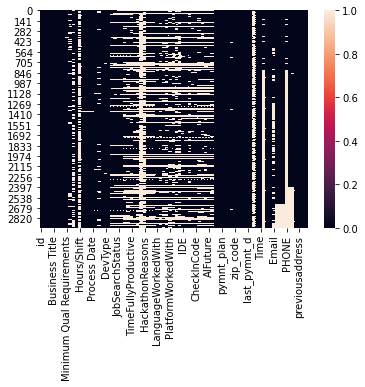

In [15]:
sns.heatmap(data.isnull())

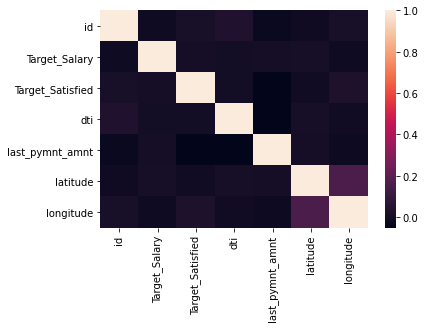

In [16]:
sns.heatmap(data.corr())

In [18]:
data.isnull().sum()

id                    0
Target_Salary         0
Target_Satisfied      0
LOAN_AMT              0
Business Title        0
                   ... 
website             547
dateAdded             0
previousaddress       0
phones                0
CrimeTime             0
Length: 83, dtype: int64

In [19]:
#Taking care of missing values
#Dropping columns with too many missing values(Threshold = 25% missing values)

In [21]:
df_temp = pd.DataFrame()
for column in data:
    missing = data.isnull().sum()[column]
    missing_percentage = missing/len(data)
    if missing_percentage < 0.10:
        df_temp[column] = data[column]

In [23]:
df_temp.isnull().sum()

id                             0
Target_Salary                  0
Target_Satisfied               0
LOAN_AMT                       0
Business Title                 0
Civil Service Title            0
Division/Work Unit             0
Job Description                0
Minimum Qual Requirements     20
To Apply                       1
Residency Requirement          4
Posting Date                   4
Posting Updated                4
Process Date                   4
FormalEducation               52
CompanySize                    0
DevType                       45
YearsCoding                    3
term                           0
loan_status                    0
pymnt_plan                     0
orignal_website_directory      0
purpose                        0
title                         64
zip_code                       0
addr_state                     0
dti                            0
earliest_cr_line               0
last_pymnt_d                   0
last_pymnt_amnt                0
last_credi

In [ ]:
#handling rest missing values:

In [34]:
for i in df_temp.columns:
    df_temp[i].fillna(df_temp[i].mode()[0], inplace = True)

In [35]:
#Diving Dataset into 3 parts Categorical, Numerical and Target¶

In [40]:
df_temp.columns

Index(['id', 'Target_Salary', 'Target_Satisfied', 'LOAN_AMT', 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'FormalEducation',
       'CompanySize', 'DevType', 'YearsCoding', 'term', 'loan_status',
       'pymnt_plan', 'orignal_website_directory', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'Time',
       'your_favoritearticle_today', 'url', 'dateAdded', 'previousaddress',
       'phones', 'CrimeTime'],
      dtype='object')

In [41]:
df_temp.dtypes

id                              int64
Target_Salary                 float64
Target_Satisfied                int64
LOAN_AMT                       object
Business Title                 object
Civil Service Title            object
Division/Work Unit             object
Job Description                object
Minimum Qual Requirements      object
To Apply                       object
Residency Requirement          object
Posting Date                   object
Posting Updated                object
Process Date                   object
FormalEducation                object
CompanySize                    object
DevType                        object
YearsCoding                    object
term                           object
loan_status                    object
pymnt_plan                     object
orignal_website_directory      object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti         

In [43]:
cat_col = [ 'Business Title',
       'Civil Service Title', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'To Apply', 'Residency Requirement',
       'Posting Date', 'Posting Updated', 'Process Date', 'FormalEducation',
       'CompanySize', 'DevType', 'YearsCoding', 'term', 'loan_status',
       'pymnt_plan', 'orignal_website_directory', 'purpose', 'title',
       'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d',
       'last_credit_pull_d', 'Time',
       'your_favoritearticle_today', 'url', 'dateAdded', 'previousaddress',
       'phones', 'CrimeTime']

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
df_temp['LOAN_AMT']=le.fit_transform(df_temp['LOAN_AMT'])

In [48]:
num_col = ['LOAN_AMT', 'dti', 'last_pymnt_amnt']

In [49]:
target_col = ['Target_Salary', 'Target_Satisfied']

In [50]:
df_c = pd.DataFrame(df_temp[cat_col])
df_c.head(2)

,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,To Apply,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,CompanySize,DevType,YearsCoding,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d,Time,your_favoritearticle_today,url,dateAdded,previousaddress,phones,CrimeTime
0,Account Manager,CONTRACT REVIEWER (OFFICE OF L,Strategy & Analytics,Division of Economic & Financial Opportunity (...,1.\tA baccalaureate degree from an accredited ...,"Click the ""Apply Now"" button.",New York City residency is generally required ...,2011-06-24T00:00:00.000,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)",20 to 99 employees,Full-stack developer,3-5 years,36 months,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,3-Aug,19-Jan,19-Mar,3/22/2016 9:51,https://www.reuters.com/article/us-tesla-crash...,nobell.it/70ffb52d079109dca5664cce6f317373782/...,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:30:00
1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,Tech Talent Pipeline,The New York City Department of Small Business...,1. A baccalaureate degree from an accredited c...,"In addition to applying through this website, ...",New York City residency is generally required ...,2012-01-26T00:00:00.000,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000,"Bachelors degree (BA, BS, B.Eng., etc.)","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,36 months,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,Dec-99,16-Jun,19-Mar,3/22/2016 10:08,https://www.irishtimes.com/business/economy/un...,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,2016-04-22T02:47:48Z,1045 San Pablo Ave,(510) 528-2375,23:00:00


0    2327
1     619
Name: Target_Satisfied, dtype: int64


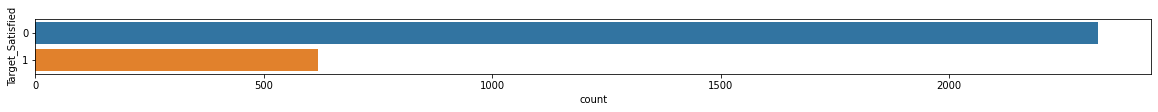

In [32]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Target_Satisfied', data=data);
print(data['Target_Satisfied'].value_counts())

In [53]:
df_t = pd.DataFrame(df_temp[target_col])
df_t.head(2)

,Target_Salary,Target_Satisfied
0,42405.0,0
1,60740.0,1


In [52]:

df_n = pd.DataFrame(df_temp[num_col])
df_n.head(2)

,LOAN_AMT,dti,last_pymnt_amnt
0,335,5.91,122.67
1,282,16.06,926.35


In [61]:
#Helper Function to handle Categorical Values
def create_dict(name=str):
    temp_dict = {}
    count = 0
    for i in df_temp[name].unique():
        temp_dict[i] = count
        count +=1
    return temp_dict

In [62]:

def cat_num(columns):
    for i in columns: 
        df_c[i] = df_c[i].map(create_dict(i))

In [63]:
cat_num(cat_col)

In [64]:
df_c.head(2)

,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,To Apply,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,CompanySize,DevType,YearsCoding,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d,Time,your_favoritearticle_today,url,dateAdded,previousaddress,phones,CrimeTime
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1


In [65]:
#Merging Categorical and Numerical dataset

In [66]:
df_new = pd.concat([df_c, df_n], axis=1)
df_new.head(2)

,Business Title,Civil Service Title,Division/Work Unit,Job Description,Minimum Qual Requirements,To Apply,Residency Requirement,Posting Date,Posting Updated,Process Date,FormalEducation,CompanySize,DevType,YearsCoding,term,loan_status,pymnt_plan,orignal_website_directory,purpose,title,zip_code,addr_state,earliest_cr_line,last_pymnt_d,last_credit_pull_d,Time,your_favoritearticle_today,url,dateAdded,previousaddress,phones,CrimeTime,LOAN_AMT,dti,last_pymnt_amnt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,335,5.91,122.67
1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,282,16.06,926.35


In [ ]:
# MODEL TRAINING (CLASSIFICATION) - Target_Satisfied'

In [67]:
X = df_new
y = df_t['Target_Satisfied']

In [68]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:

from xgboost import XGBClassifier
from sklearn.metrics import f1_score
XGB = XGBClassifier()
XGB.fit(X_train_scaled, y_train)
predictions = XGB.predict(X_test_scaled)

In [72]:
print("f1 score : ",f1_score(y_test, predictions, average='micro')*100)

f1 score :  78.47457627118645


In [76]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
prediction = rf.predict(X_test_scaled)

In [77]:
print("f1 score : ",f1_score(y_test, prediction, average='micro')*100)

f1 score :  78.47457627118645


In [78]:
# MODEL TRAINING (Regression) - Target_Salary

In [90]:
X = df_new
y = df_t['Target_Salary'] 

In [92]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [94]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
KNN = KNeighborsRegressor()
KNN.fit(X_train_scaled, y_train)
predictions = KNN.predict(X_test_scaled)

In [103]:
MSE=np.square(np.subtract(y_test,predictions)).mean() 
MSE

823008100.9549901

In [106]:
import math 
RMSE = math.sqrt(MSE)
RMSE

28688.117765984407